In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
df = pd.read_csv('dataframe_train.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,action_type,date,group,level,speed,max_load,weather_grade,aoi_id,shop_id,id,source_type,source_tracking_id,source_lng,source_lat,target_lng,target_lat,grid_distance,expected_use_time,urgency,hour
0,10007871,0,2.100070e+18,121.630997,39.142343,PICKUP,20200201,2.020020e+16,3,4.751832,11,Normal Weather,81141ae62972bc11642cde98fd667df0,944b7864d46e8a1aece1319212c9ae88,120,ASSIGN,2.100070e+18,121.630997,39.142343,121.632547,39.141946,377.0,804,1246,11
1,10007871,0,2.100070e+18,121.630997,39.142343,DELIVERY,20200201,2.020020e+16,3,4.751832,11,Normal Weather,81141ae62972bc11642cde98fd667df0,944b7864d46e8a1aece1319212c9ae88,121,PICKUP,2.100070e+18,121.632547,39.141946,121.626144,39.140281,780.0,298,1246,11
2,10007871,0,2.100070e+18,121.630997,39.142343,PICKUP,20200201,2.020020e+16,3,4.751832,11,Normal Weather,b71df7214347524a0f5f0c79dfdf2f4e,88ac051764fe348382e6529948de8015,122,DELIVERY,2.100070e+18,121.626144,39.140281,121.631219,39.141811,550.0,545,2462,11
3,10007871,0,2.100070e+18,121.630997,39.142343,DELIVERY,20200201,2.020020e+16,3,4.751832,11,Normal Weather,b71df7214347524a0f5f0c79dfdf2f4e,88ac051764fe348382e6529948de8015,123,PICKUP,2.100070e+18,121.631219,39.141811,121.632084,39.146201,707.0,341,1205,11
4,10007871,0,2.100070e+18,121.630997,39.142343,PICKUP,20200201,2.020020e+16,3,4.751832,11,Normal Weather,753c1911e8a294c5db901f8555faff0c,92ec52685bd511da262ee6f7a0adaa87,124,DELIVERY,2.100070e+18,121.632084,39.146201,121.631574,39.142231,770.0,166,1882,11


In [5]:
df.shape

(509604, 25)

In [6]:
df.describe()

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,date,group,level,speed,max_load,id,source_tracking_id,source_lng,source_lat,target_lng,target_lat,grid_distance,expected_use_time,urgency,hour
count,5.096040e+05,509604.000000,5.096040e+05,509604.000000,509604.000000,5.096040e+05,5.096040e+05,509604.000000,509604.000000,509604.000000,509604.000000,5.096040e+05,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000
mean,8.151255e+07,2.400154,2.100076e+18,121.534935,39.179724,2.020022e+07,1.496302e+17,2.607338,5.348056,8.980295,254801.500000,2.100076e+18,121.534923,39.179897,121.534882,39.179971,1078.274900,441.655107,1572.033695,14.482592
std,4.903781e+07,2.168523,4.797124e+12,0.151081,0.114737,7.776252e+00,1.333406e+17,0.698855,0.626070,2.028490,147110.147627,4.797965e+12,0.150718,0.113594,0.150752,0.113615,1124.569317,405.080785,4344.556228,3.310272
min,1.000787e+07,0.000000,2.100070e+18,119.876654,36.064995,2.020020e+07,2.020020e+16,0.000000,3.008735,1.000000,0.000000,2.100070e+18,119.876654,36.064995,121.059274,38.826421,0.000000,1.000000,-340771.000000,6.000000
25%,1.069734e+07,1.000000,2.100070e+18,121.444628,39.116955,2.020021e+07,2.020020e+16,2.000000,4.868302,8.000000,127400.750000,2.100070e+18,121.444174,39.117340,121.444254,39.117201,330.000000,189.000000,859.000000,12.000000
50%,1.117511e+08,2.000000,2.100080e+18,121.523819,39.162378,2.020022e+07,2.020020e+17,3.000000,5.458097,9.000000,254801.500000,2.100080e+18,121.523930,39.161311,121.523587,39.161241,869.000000,354.000000,1752.000000,14.000000
75%,1.187608e+08,4.000000,2.100080e+18,121.591983,39.218092,2.020022e+07,2.020020e+17,3.000000,5.779434,10.000000,382202.250000,2.100080e+18,121.591344,39.218011,121.591347,39.218921,1572.000000,584.000000,2590.000000,17.000000
max,1.259969e+08,16.000000,2.100080e+18,122.256382,39.705013,2.020023e+07,2.020020e+18,3.000000,6.943103,19.000000,509603.000000,2.100080e+18,122.260124,39.705013,122.260124,39.695211,429173.000000,9246.000000,11345.000000,23.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509604 entries, 0 to 509603
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   courier_id              509604 non-null  int64  
 1   wave_index              509604 non-null  int64  
 2   tracking_id             509604 non-null  float64
 3   courier_wave_start_lng  509604 non-null  float64
 4   courier_wave_start_lat  509604 non-null  float64
 5   action_type             509604 non-null  object 
 6   date                    509604 non-null  int64  
 7   group                   509604 non-null  float64
 8   level                   509604 non-null  int64  
 9   speed                   509604 non-null  float64
 10  max_load                509604 non-null  int64  
 11  weather_grade           509604 non-null  object 
 12  aoi_id                  509604 non-null  object 
 13  shop_id                 509604 non-null  object 
 14  id                  

In [8]:
for col in df.select_dtypes(include = 'object').columns:
    print(col, ':', df[col].unique(), ',', 'Numbers:',df[col].nunique(),'\n')

action_type : ['PICKUP' 'DELIVERY'] , Numbers: 2 

weather_grade : ['Normal Weather' 'Very Bad Weather' 'Bad Weather' 'Slightly Bad Weather'] , Numbers: 4 

aoi_id : ['81141ae62972bc11642cde98fd667df0' 'b71df7214347524a0f5f0c79dfdf2f4e'
 '753c1911e8a294c5db901f8555faff0c' ... '92a1a014e071c0488aea06740ad36b7a'
 '8df4ba59835581008f1b872abe13660c' 'b0f93a266abc6dcdc682659ff58e9994'] , Numbers: 34912 

shop_id : ['944b7864d46e8a1aece1319212c9ae88' '88ac051764fe348382e6529948de8015'
 '92ec52685bd511da262ee6f7a0adaa87' ... '5527fde6b61dad5536dd881cec202704'
 '7bedf053333c3010aab730ab194efd59' '4c16b68804c28b21b8d933cbca64a0eb'] , Numbers: 11193 

source_type : ['ASSIGN' 'PICKUP' 'DELIVERY'] , Numbers: 3 



In [9]:
df.columns

Index(['courier_id', 'wave_index', 'tracking_id', 'courier_wave_start_lng',
       'courier_wave_start_lat', 'action_type', 'date', 'group', 'level',
       'speed', 'max_load', 'weather_grade', 'aoi_id', 'shop_id', 'id',
       'source_type', 'source_tracking_id', 'source_lng', 'source_lat',
       'target_lng', 'target_lat', 'grid_distance', 'expected_use_time',
       'urgency', 'hour'],
      dtype='object')

# Feature Selection

In [10]:
# Drop unrelated features
df = df.drop(['wave_index', 'courier_id', 'tracking_id', 'date', 'group', 'aoi_id', 'shop_id', 'id', 
         'source_tracking_id','expected_use_time'], axis = 1)

# Encode weather condition into ordinal number, source type into dummy variables
df['weather_grade'].replace({'Very Bad Weather':1, 'Bad Weather':2, 'Slightly Bad Weather':3, 'Normal Weather':4}, inplace = True)
df = pd.get_dummies(data = df, columns = ['source_type'], drop_first = True)
df = pd.get_dummies(data = df, columns = ['action_type'])
df.drop(['action_type_PICKUP'], axis = 1, inplace = True)

In [11]:
df.describe()

,courier_wave_start_lng,courier_wave_start_lat,level,speed,max_load,weather_grade,source_lng,source_lat,target_lng,target_lat,grid_distance,urgency,hour,source_type_DELIVERY,source_type_PICKUP,action_type_DELIVERY
count,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.0,509604.0
mean,121.534935,39.179724,2.607338,5.348056,8.980295,3.497473,121.534923,39.179897,121.534882,39.179971,1078.274900,1572.033695,14.482592,0.350729,0.5,0.5
std,0.151081,0.114737,0.698855,0.626070,2.028490,1.013696,0.150718,0.113594,0.150752,0.113615,1124.569317,4344.556228,3.310272,0.477199,0.5,0.5
min,119.876654,36.064995,0.000000,3.008735,1.000000,1.000000,119.876654,36.064995,121.059274,38.826421,0.000000,-340771.000000,6.000000,0.000000,0.0,0.0
25%,121.444628,39.116955,2.000000,4.868302,8.000000,4.000000,121.444174,39.117340,121.444254,39.117201,330.000000,859.000000,12.000000,0.000000,0.0,0.0
50%,121.523819,39.162378,3.000000,5.458097,9.000000,4.000000,121.523930,39.161311,121.523587,39.161241,869.000000,1752.000000,14.000000,0.000000,0.5,0.5
75%,121.591983,39.218092,3.000000,5.779434,10.000000,4.000000,121.591344,39.218011,121.591347,39.218921,1572.000000,2590.000000,17.000000,1.000000,1.0,1.0
max,122.256382,39.705013,3.000000,6.943103,19.000000,4.000000,122.260124,39.705013,122.260124,39.695211,429173.000000,11345.000000,23.000000,1.000000,1.0,1.0


In [14]:
import dataframe_image as dfi
dfi.export(obj = df.describe(), filename = 'des_cla.jpg', fontsize = 14, max_rows = None, max_cols = None)

objc[79414]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb50fb0ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.100/Libraries/libGLESv2.dylib (0x1119ce220). One of the two will be used. Which one is undefined.
[0227/190757.450480:INFO:headless_shell.cc(107)] 89054 bytes written to file /var/folders/m0/xn5d3l091k97mhhzk0mjcwl40000gn/T/tmpvooabw4k/temp.png
objc[79427]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb50fb0ec8) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/110.0.5481.100/Libraries/libGLESv2.dylib (0x111c48220). One of the two will be used. Which one is undefined.
[0227/190758.087922:INFO:headle

# Process unreasonable values and outliers

In [16]:
# Turn negative values in 'urgency' to positive ones
df['urgency'] = abs(df['urgency'])
temp1 = df.copy()
temp1.describe()

,courier_wave_start_lng,courier_wave_start_lat,level,speed,max_load,weather_grade,source_lng,source_lat,target_lng,target_lat,grid_distance,urgency,hour,source_type_DELIVERY,source_type_PICKUP,action_type_DELIVERY
count,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.000000,509604.0,509604.0
mean,121.534935,39.179724,2.607338,5.348056,8.980295,3.497473,121.534923,39.179897,121.534882,39.179971,1078.274900,2292.373374,14.482592,0.350729,0.5,0.5
std,0.151081,0.114737,0.698855,0.626070,2.028490,1.013696,0.150718,0.113594,0.150752,0.113615,1124.569317,4011.418404,3.310272,0.477199,0.5,0.5
min,119.876654,36.064995,0.000000,3.008735,1.000000,1.000000,119.876654,36.064995,121.059274,38.826421,0.000000,0.000000,6.000000,0.000000,0.0,0.0
25%,121.444628,39.116955,2.000000,4.868302,8.000000,4.000000,121.444174,39.117340,121.444254,39.117201,330.000000,877.000000,12.000000,0.000000,0.0,0.0
50%,121.523819,39.162378,3.000000,5.458097,9.000000,4.000000,121.523930,39.161311,121.523587,39.161241,869.000000,1784.000000,14.000000,0.000000,0.5,0.5
75%,121.591983,39.218092,3.000000,5.779434,10.000000,4.000000,121.591344,39.218011,121.591347,39.218921,1572.000000,2641.000000,17.000000,1.000000,1.0,1.0
max,122.256382,39.705013,3.000000,6.943103,19.000000,4.000000,122.260124,39.705013,122.260124,39.695211,429173.000000,340771.000000,23.000000,1.000000,1.0,1.0


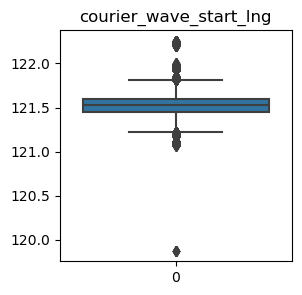

<Figure size 640x480 with 0 Axes>

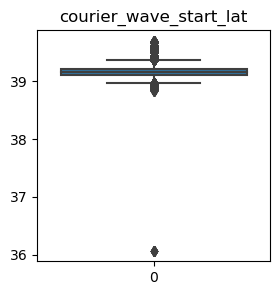

<Figure size 640x480 with 0 Axes>

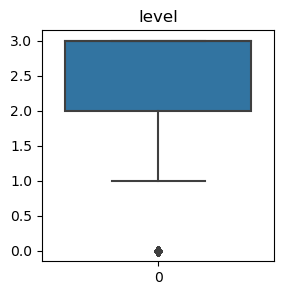

<Figure size 640x480 with 0 Axes>

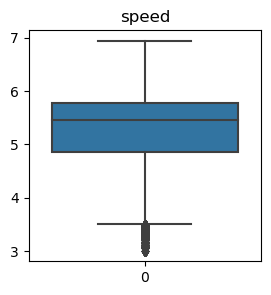

<Figure size 640x480 with 0 Axes>

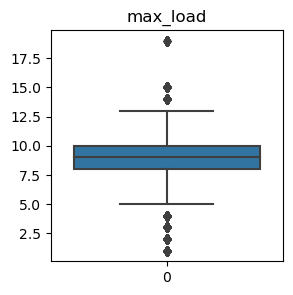

<Figure size 640x480 with 0 Axes>

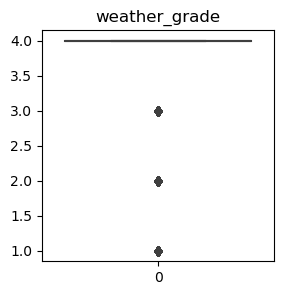

<Figure size 640x480 with 0 Axes>

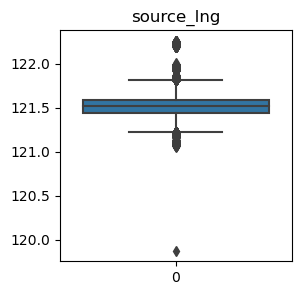

<Figure size 640x480 with 0 Axes>

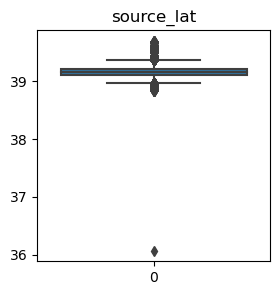

<Figure size 640x480 with 0 Axes>

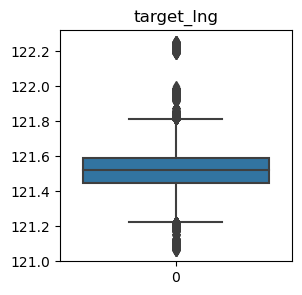

<Figure size 640x480 with 0 Axes>

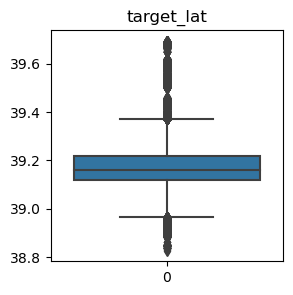

<Figure size 640x480 with 0 Axes>

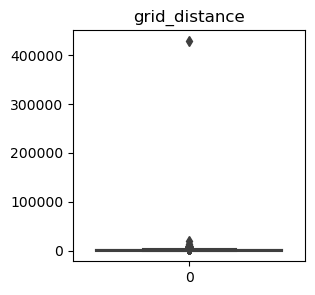

<Figure size 640x480 with 0 Axes>

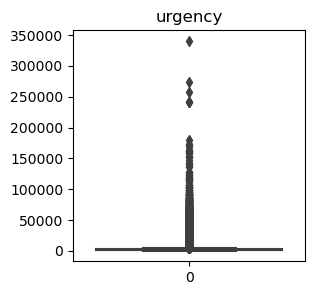

<Figure size 640x480 with 0 Axes>

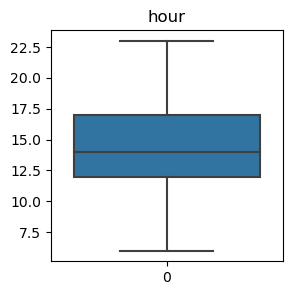

<Figure size 640x480 with 0 Axes>

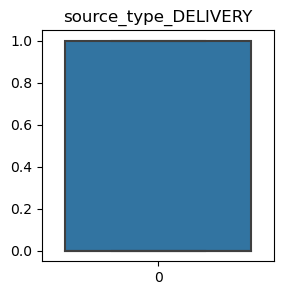

<Figure size 640x480 with 0 Axes>

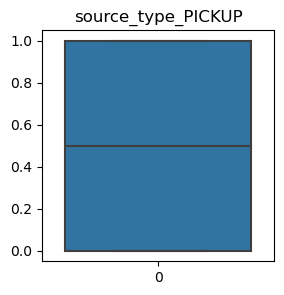

<Figure size 640x480 with 0 Axes>

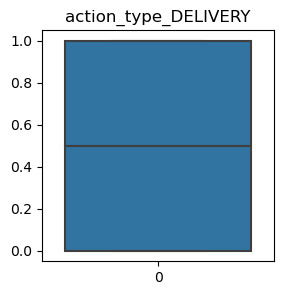

<Figure size 640x480 with 0 Axes>

In [18]:
for col in temp1.columns:
    plt.figure(figsize = (3,3))
    plt.title(col)
    sns.boxplot(data = temp1[col])
    plt.savefig(str(col)+'.png', bbox_inches= 'tight')
    plt.show()
    plt.clf()

In [19]:
# Define function to convert outliers to NA （20.56 结果 极端值1.5iqr， 如果结果不好明天尝试1%， 代码已改好）
def outlier_to_null(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    for x in [col]:
        data.loc[data[col] < lb, x] = np.nan
        data.loc[data[col] > ub, x] = np.nan

In [20]:
cols = temp1.columns
cols = list(cols.drop('weather_grade'))

In [21]:
for col in cols:
    outlier_to_null(temp1, col)
temp1.isna().sum()

courier_wave_start_lng    23584
courier_wave_start_lat    35936
level                     13732
speed                      1542
max_load                  21528
weather_grade                 0
source_lng                23894
source_lat                37452
target_lng                24135
target_lat                36144
grid_distance             13251
urgency                   21149
hour                          0
source_type_DELIVERY          0
source_type_PICKUP            0
action_type_DELIVERY          0
dtype: int64

In [22]:
temp1.dropna(inplace = True)

In [23]:
temp1.describe()

,courier_wave_start_lng,courier_wave_start_lat,level,speed,max_load,weather_grade,source_lng,source_lat,target_lng,target_lat,grid_distance,urgency,hour,source_type_DELIVERY,source_type_PICKUP,action_type_DELIVERY
count,397118.000000,397118.000000,397118.000000,397118.000000,397118.000000,397118.000000,397118.000000,397118.000000,397118.000000,397118.000000,397118.000000,397118.000000,397118.000000,397118.000000,397118.000000,397118.000000
mean,121.525613,39.166484,2.688848,5.328706,9.177668,3.498575,121.525564,39.166574,121.525548,39.166636,988.242540,1795.554923,14.507141,0.342923,0.504364,0.489633
std,0.103794,0.073854,0.545465,0.598055,1.673304,1.015428,0.103630,0.073643,0.103690,0.073755,819.035914,1032.534217,3.289527,0.474687,0.499982,0.499893
min,121.223597,38.965286,1.000000,3.504931,5.000000,1.000000,121.223494,38.966411,121.223633,38.964651,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000
25%,121.453256,39.117134,2.000000,4.873929,8.000000,4.000000,121.454071,39.117481,121.454071,39.117404,308.000000,873.000000,12.000000,0.000000,0.000000,0.000000
50%,121.524246,39.158192,3.000000,5.442386,9.000000,4.000000,121.524304,39.157186,121.523984,39.157167,829.000000,1758.000000,14.000000,0.000000,1.000000,0.000000
75%,121.581989,39.209070,3.000000,5.743708,10.000000,4.000000,121.582104,39.208320,121.582124,39.208358,1483.000000,2550.000000,18.000000,1.000000,1.000000,1.000000
max,121.813000,39.369796,3.000000,6.943103,13.000000,4.000000,121.812094,39.369011,121.811930,39.371501,3435.000000,5286.000000,23.000000,1.000000,1.000000,1.000000


In [25]:
cor_log = temp1.drop(['action_type_DELIVERY'], axis = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

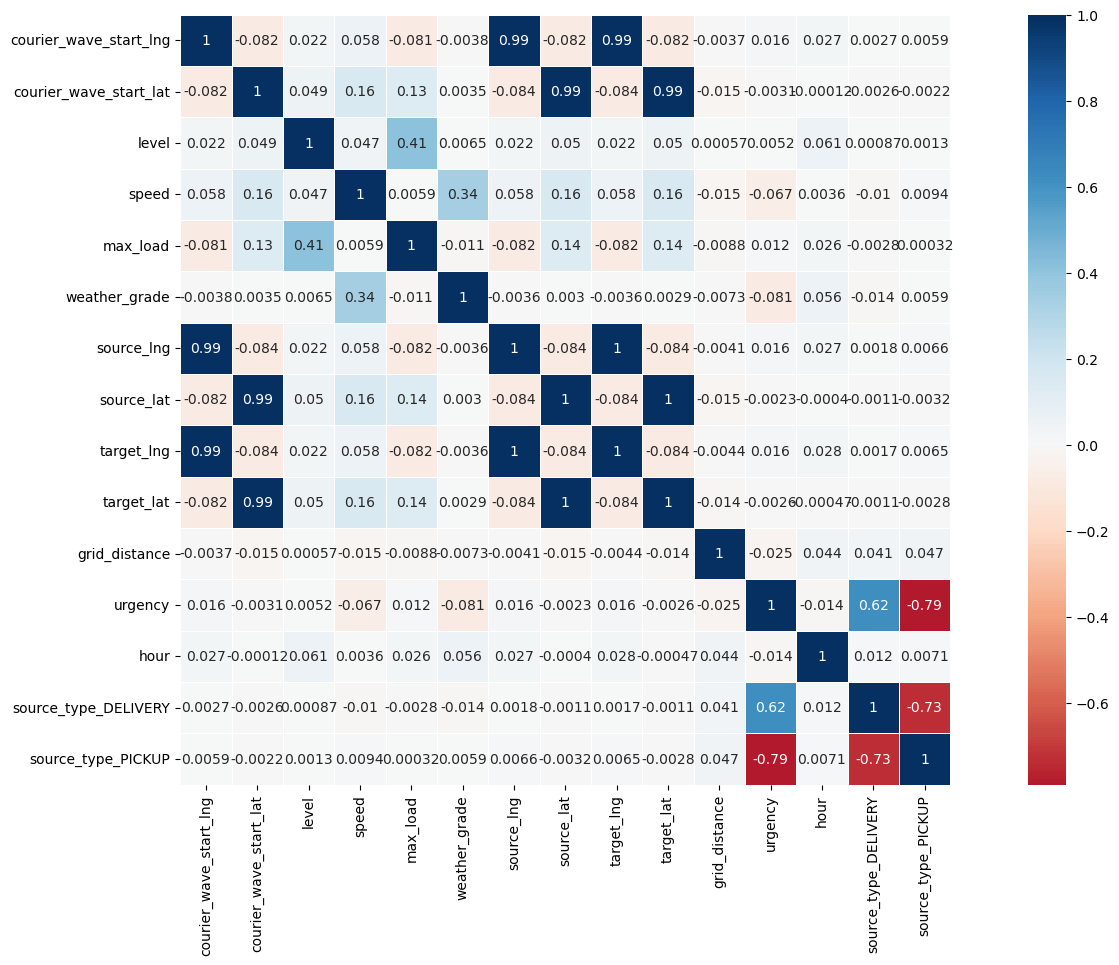

In [27]:
plt.figure(figsize = (20,10))
sns.heatmap(cor_log.corr(), annot = True, cmap = "RdBu", center = 0,  vmax = 1, square = True, linewidths = 0.5)
plt.savefig('cor2.jpg', bbox_inches = 'tight')
plt.show

# Baseline Model

In [28]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [29]:
X = temp1.drop(['action_type_DELIVERY'], axis = 1)
y = temp1['action_type_DELIVERY']

In [30]:
LogR = cross_validate(LogisticRegression(max_iter = 5000), X, y, scoring = 'f1', cv = 5)
print('The F1 score of validation data is',LogR['test_score'].mean())

The F1 score of validation data is 0.7291442417727683


# XGBoost

In [31]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score

In [32]:
grid_params = {'learning_rate':np.linspace(0.01,0.05,5), 'max_depth':np.arange(5,7)}

In [33]:
grid = GridSearchCV(XGBClassifier(objective = 'binary:logistic',colsample_bynode = 0.8,
                                  reg_lambda = 1, gamma = 0.001,), grid_params, scoring = 'f1', cv = 5)

In [34]:
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=0.8,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0.001, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=1, ...),
             param_grid={'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05]),
                         'max_depth': array([5, 6])},
             scoring='f1')

In [35]:
grid.best_score_

0.8072255222399397

In [36]:
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 6}

In [39]:
model = XGBClassifier(objective = 'binary:logistic', colsample_bynode = 0.8, reg_lambda = 1, gamma = 0.001,
                    learning_rate = 0.05, max_depth = 6).fit(X,y)

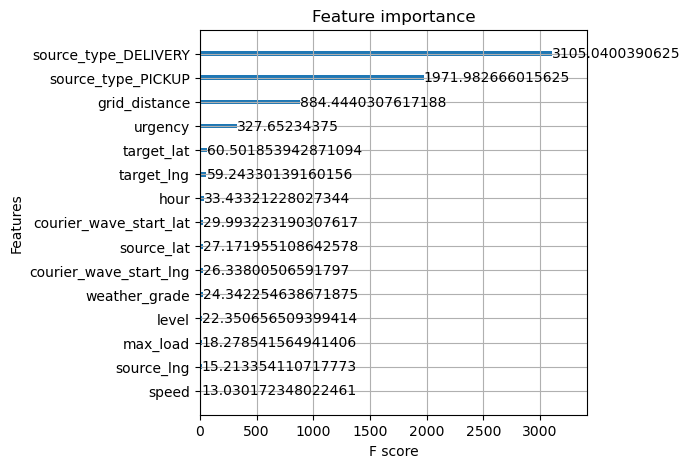

In [40]:
fig, ax = plt.subplots(figsize = (5,5))
plot_importance(model, ax = ax,importance_type = 'gain')
plt.savefig('FI_Cla.png', bbox_inches = 'tight')
plt.show()

# Further Feature Engineering

In [41]:
temp2 = df.drop(['speed', 'max_load', 'level', 'hour', 'source_lat', 'source_lng', 
                   'courier_wave_start_lng', 'courier_wave_start_lat', 'hour'], axis = 1)

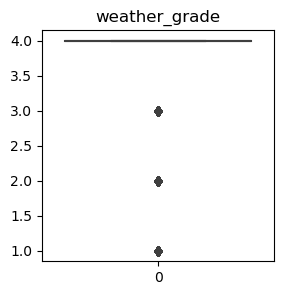

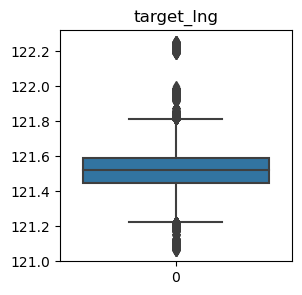

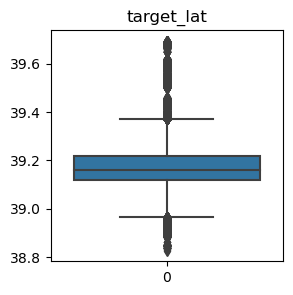

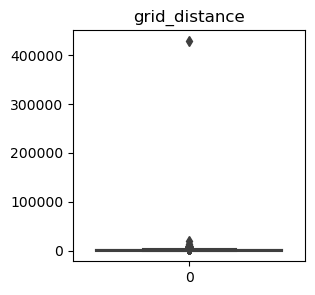

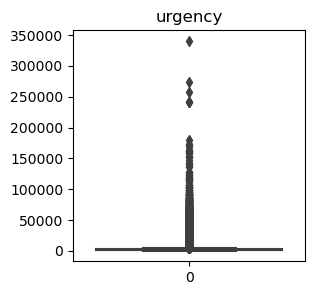

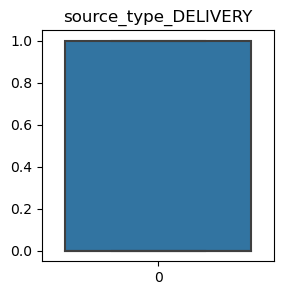

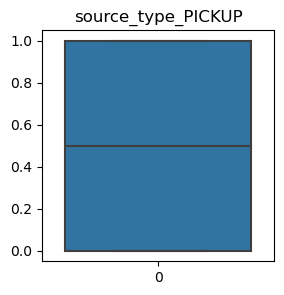

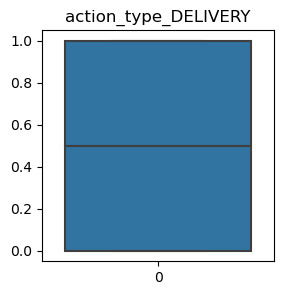

In [42]:
for col in temp2.columns:
    plt.figure(figsize = (3,3))
    plt.title(col)
    sns.boxplot(data = temp2[col])

In [43]:
cols = temp2.columns
cols = list(cols.drop('weather_grade'))

In [44]:
for col in cols:
    outlier_to_null(temp2, col)

In [45]:
temp2.isna().sum()

weather_grade               0
target_lng              24135
target_lat              36144
grid_distance           13251
urgency                 21149
source_type_DELIVERY        0
source_type_PICKUP          0
action_type_DELIVERY        0
dtype: int64

In [46]:
temp2.dropna(inplace = True)

In [47]:
temp2.head()

,weather_grade,target_lng,target_lat,grid_distance,urgency,source_type_DELIVERY,source_type_PICKUP,action_type_DELIVERY
0,4,121.632547,39.141946,377.0,1246.0,0.0,0.0,0.0
1,4,121.626144,39.140281,780.0,1246.0,0.0,1.0,1.0
2,4,121.631219,39.141811,550.0,2462.0,1.0,0.0,0.0
3,4,121.632084,39.146201,707.0,1205.0,0.0,1.0,1.0
4,4,121.631574,39.142231,770.0,1882.0,1.0,0.0,0.0


# Re-modeling

In [59]:
X = temp2.drop(['action_type_DELIVERY'], axis = 1)
y = temp2['action_type_DELIVERY']

In [60]:
grid_params = {'learning_rate':np.linspace(0.05,0.1,5), 'max_depth':np.arange(17,21)}

In [61]:
grid = GridSearchCV(XGBClassifier(objective = 'binary:logistic', colsample_bynode = 0.6, reg_lambda = 0.5),
                    grid_params, scoring = 'f1', cv = 5)

In [62]:
grid.fit(X,y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=0.6,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat...=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=0.5, ...),
             param_grid={'learning_rate': array([0.05  , 0.0625, 0.075 , 0.0875, 0.1   ]),
                         'max_depth': array([17, 18, 19, 20])},
             scoring='f1')

In [63]:
grid.best_score_

0.9185210090384188

In [64]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 19}

In [65]:
model2 = XGBClassifier(objective = 'reg:logistic', colsample_bynode = 0.8, reg_lambda = 1, gamma = 0.001,
                    learning_rate = 0.1, max_depth = 19).fit(X, y)

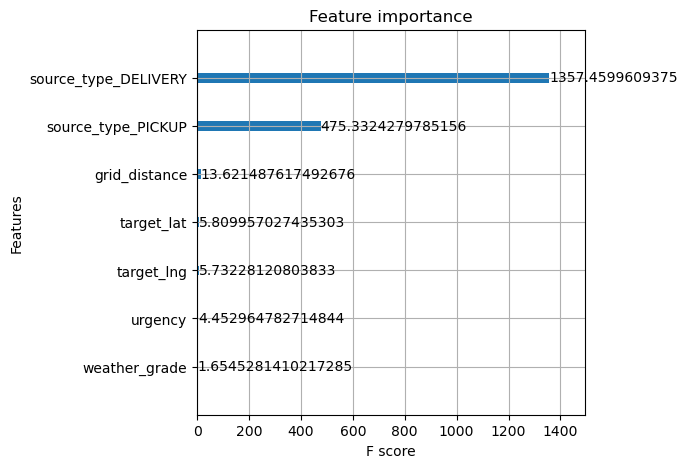

In [66]:
fig, ax = plt.subplots(figsize = (5,5))
plot_importance(model2, ax = ax,importance_type = 'gain')
plt.savefig('FI_Cla1.png', bbox_inches = 'tight')
plt.show()

# Predition

In [67]:
test = pd.read_csv('dataframe_test.csv')
test.head()

,courier_id,wave_index,tracking_id,courier_wave_start_lng,courier_wave_start_lat,date,group,level,speed,max_load,weather_grade,aoi_id,shop_id,id,source_type,source_tracking_id,source_lng,source_lat,target_lng,target_lat,grid_distance,urgency,hour
0,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,Normal Weather,bf49288eb197bc6b44fa0573acf8c74d,34887bf8e1a0de848d271bc6b7059670,509790,ASSIGN,2.10E+18,121.630558,39.140900,121.629930,39.144603,796.0,1776,13
1,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,Normal Weather,bf49288eb197bc6b44fa0573acf8c74d,34887bf8e1a0de848d271bc6b7059670,509791,PICKUP,2.10E+18,121.629930,39.144603,121.629604,39.150661,1048.0,697,13
2,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,Normal Weather,9291e6fede798be58711cf53419eb285,34887bf8e1a0de848d271bc6b7059670,509792,DELIVERY,2.10E+18,121.629604,39.150661,121.629930,39.144603,1019.0,1756,13
3,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,Normal Weather,9291e6fede798be58711cf53419eb285,34887bf8e1a0de848d271bc6b7059670,509793,PICKUP,2.10E+18,121.629930,39.144603,121.630544,39.152711,1198.0,676,13
4,10007871,2,2.100000e+18,121.630558,39.1409,20200228,2.020000e+16,3,5.535851,11,Normal Weather,4fdb588dc34ac31ce738a32696315b5d,5e65ed920db306852d16f1ec176011ed,509794,DELIVERY,2.10E+18,121.630544,39.152711,121.631446,39.142762,1275.0,2336,14


In [68]:
X.columns

Index(['weather_grade', 'target_lng', 'target_lat', 'grid_distance', 'urgency',
       'source_type_DELIVERY', 'source_type_PICKUP'],
      dtype='object')

In [69]:
test = test[['weather_grade', 'target_lng', 'target_lat', 'grid_distance', 'urgency',
       'source_type']]

In [70]:
for col in test.select_dtypes(include = 'object').columns:
     print(col, ':', test[col].unique(), ',', 'Numbers:',test[col].nunique(),'\n')

weather_grade : ['Normal Weather' 'Slightly Bad Weather' 'Bad Weather' 'Very Bad Weather'] , Numbers: 4 

source_type : ['ASSIGN' 'PICKUP' 'DELIVERY' '2.10E+18'] , Numbers: 4 



In [71]:
import random
test.loc[test['source_type'] == '2.10E+18', 'source_type'] = random.choice(['ASSIGN','PICKUP','DELIVERY'])

In [72]:
# Encode weather condition into ordinal number, source type into dummy variables
test['weather_grade'].replace({'Very Bad Weather':1, 'Bad Weather':2, 'Slightly Bad Weather':3, 'Normal Weather':4}, inplace = True)
test = pd.get_dummies(data = test, columns = ['source_type'], drop_first = True)

In [73]:
test.describe()

,weather_grade,target_lng,target_lat,grid_distance,urgency,source_type_DELIVERY,source_type_PICKUP
count,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000
mean,3.996309,121.534047,39.178784,1030.252759,1528.235668,0.359549,0.499921
std,0.065618,0.146604,0.113424,921.641202,3982.104312,0.479878,0.500010
min,1.000000,121.083904,38.836801,0.000000,-161639.000000,0.000000,0.000000
25%,4.000000,121.439104,39.116259,299.000000,847.000000,0.000000,0.000000
50%,4.000000,121.523875,39.162166,821.000000,1708.500000,0.000000,0.000000
75%,4.000000,121.595742,39.214574,1498.250000,2509.000000,1.000000,1.000000
max,4.000000,122.253524,39.688901,7978.000000,10792.000000,1.000000,1.000000


In [74]:
test['urgency'] = abs(test['urgency'])

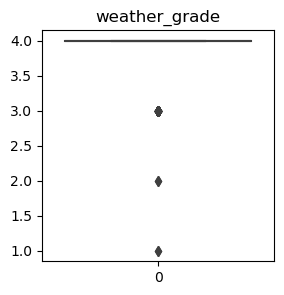

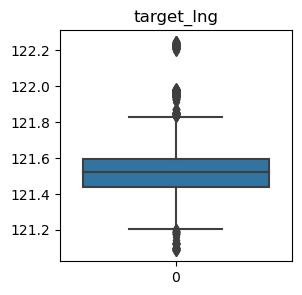

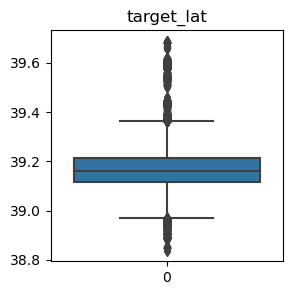

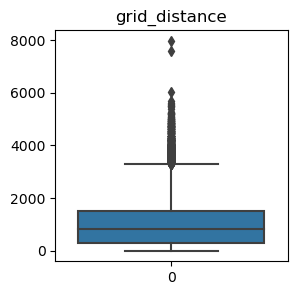

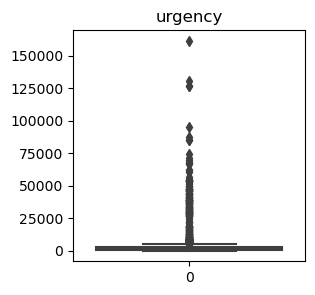

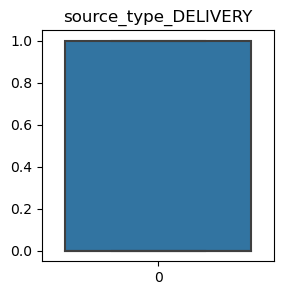

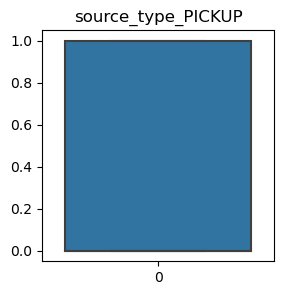

In [75]:
for col in test.columns:
    plt.figure(figsize = (3,3))
    plt.title(col)
    sns.boxplot(data = test[col])

In [76]:
# Define function to convert outliers to NA
def outlier_to_boundary(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    for x in [col]:
        data.loc[data[col] < lb, x] = lb
        data.loc[data[col] > ub, x] = ub

In [77]:
cols = test.columns
cols = cols.drop('weather_grade')

In [78]:
for col in cols:
    outlier_to_boundary(test, col)

In [79]:
test.describe()

,weather_grade,target_lng,target_lat,grid_distance,urgency,source_type_DELIVERY,source_type_PICKUP
count,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000,25468.000000
mean,3.996309,121.529342,39.172065,1013.420385,1807.282668,0.359549,0.499921
std,0.065618,0.130676,0.089889,868.596175,1132.642839,0.479878,0.500010
min,1.000000,121.204148,38.968786,0.000000,0.000000,0.000000,0.000000
25%,4.000000,121.439104,39.116259,299.000000,856.000000,0.000000,0.000000
50%,4.000000,121.523875,39.162166,821.000000,1752.000000,0.000000,0.000000
75%,4.000000,121.595742,39.214574,1498.250000,2548.000000,1.000000,1.000000
max,4.000000,121.830698,39.362046,3297.125000,5086.000000,1.000000,1.000000


In [81]:
y_pred = model2.predict(test)

In [82]:
result = pd.DataFrame(
{
    'order': np.arange(0,len(y_pred)),
    'action_type_DELIVERY':y_pred
})

In [83]:
result.to_csv('Classification.csv', index = False)